In [359]:
import pandas as pd
import os
import numpy as np

In [361]:
data = pd.read_csv(r'../data/interim/train.csv')

In [363]:
#test = pd.read_csv(r'../data/interim/test.csv')

In [365]:
numerical_df = data.select_dtypes(exclude=['object'])
categorical_df = data.select_dtypes(include=['object'])

In [367]:
columns_to_drop = ['id', 'SCC', 'SMOKE', 'FAVC', 'MTRANS']
data = data.drop(columns=columns_to_drop)

In [369]:
x = data_dropped.drop(columns=['NObeyesdad'])
y = data_dropped.NObeyesdad

In [414]:
#x.head()

In [416]:
#y.value_counts()

# Ordinal Encoding of y

In [375]:
# Define the order of the categories
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Convert 'y' to a categorical type with the specified order
y = pd.Categorical(y, categories=order, ordered=True).codes

In [377]:
y

array([3, 1, 0, ..., 5, 3, 5], dtype=int8)

In [379]:
y = pd.Series(y, name='y')

In [381]:
y

0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: y, Length: 20758, dtype: int8

In [383]:
numerical_df = x.select_dtypes(exclude=['object'])
categorical_df = x.select_dtypes(include=['object'])

In [385]:
numerical_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


In [387]:
categorical_df

,Gender,family_history_with_overweight,CAEC,CALC
0,Male,yes,Sometimes,Sometimes
1,Female,yes,Frequently,no
2,Female,yes,Sometimes,no
3,Female,yes,Sometimes,Sometimes
4,Male,yes,Sometimes,Sometimes
...,...,...,...,...
20753,Male,yes,Sometimes,Sometimes
20754,Male,no,Frequently,Sometimes
20755,Male,yes,Sometimes,no
20756,Male,yes,Sometimes,no


In [389]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in x.columns if x[cname].nunique() < 8 and x[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in x.columns if x[cname].dtype in ['int64', 'float64']]

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [393]:
X_train.to_csv('../data/interim/x_train_init.csv', index=False)
X_test.to_csv('../data/interim/x_test_init.csv', index=False)
y_train.to_csv('../data/interim/y_train_init.csv', index=False)
y_test.to_csv('../data/interim/y_test_init.csv', index=False)

In [236]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
1846,Male,32.000000,1.750000,120.000000,yes,2.000000,3.000000,Sometimes,1.000000,0.000000,2.000000,Sometimes
14225,Female,19.783234,1.822573,133.952675,yes,3.000000,3.000000,Sometimes,2.835622,1.655488,0.816986,Sometimes
9438,Male,21.793724,1.776989,89.993812,yes,2.921225,2.983201,Sometimes,2.184843,2.164472,0.000000,Sometimes
12459,Female,21.000000,1.670000,66.000000,yes,2.000000,3.000000,Sometimes,2.000000,1.000000,2.000000,Sometimes
12189,Female,25.470652,1.628205,107.378702,yes,3.000000,3.000000,Sometimes,2.554007,0.025787,0.484165,Sometimes


In [395]:
print(y_train)

1846     5
14225    6
9438     2
12459    1
12189    6
        ..
11284    2
11964    3
5390     2
860      6
15795    4
Name: y, Length: 14530, dtype: int8


In [397]:
#create numerical transformer
numerical_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')), 
                                  ('scaler', StandardScaler()) ])

#create categorical transformer
categorical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='most_frequent')),
                                            ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                            ])

In [399]:
#column transformer
preprocessor = ColumnTransformer(
                                transformers=[
                                    ('num', numerical_transformer, numerical_cols),
                                    ('cat', categorical_transformer, categorical_cols)
    ])

In [402]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=5)

# Model pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('random_forest', rf)
                         ])

# Preprocessing of training data, fit model 
rf_pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
rf_preds = rf_pipe.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_preds)
print('Accuracy for Random Forest Model:', accuracy)

# Detailed classification report
print('Classification Report:\n', classification_report(y_test, rf_preds))


Accuracy for Random Forest Model: 0.8175979447655748
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       755
           1       0.64      0.88      0.74       907
           2       0.82      0.38      0.52       733
           3       0.68      0.63      0.65       763
           4       0.75      0.81      0.78       858
           5       0.93      0.98      0.96      1005
           6       0.99      1.00      0.99      1207

    accuracy                           0.82      6228
   macro avg       0.81      0.79      0.79      6228
weighted avg       0.83      0.82      0.81      6228



In [410]:

# Create a RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Model pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('random_forest', rf)
                         ])

# Preprocessing of training data, fit model 
rf_pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
rf_preds = rf_pipe.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_preds)
print('Accuracy for Random Forest Model:', accuracy)

# Detailed classification report
print('Classification Report:\n', classification_report(y_test, rf_preds))

Accuracy for Random Forest Model: 0.8877649325626205
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       755
           1       0.82      0.88      0.85       907
           2       0.75      0.73      0.74       733
           3       0.78      0.78      0.78       763
           4       0.88      0.86      0.87       858
           5       0.97      0.98      0.97      1005
           6       1.00      1.00      1.00      1207

    accuracy                           0.89      6228
   macro avg       0.88      0.87      0.88      6228
weighted avg       0.89      0.89      0.89      6228



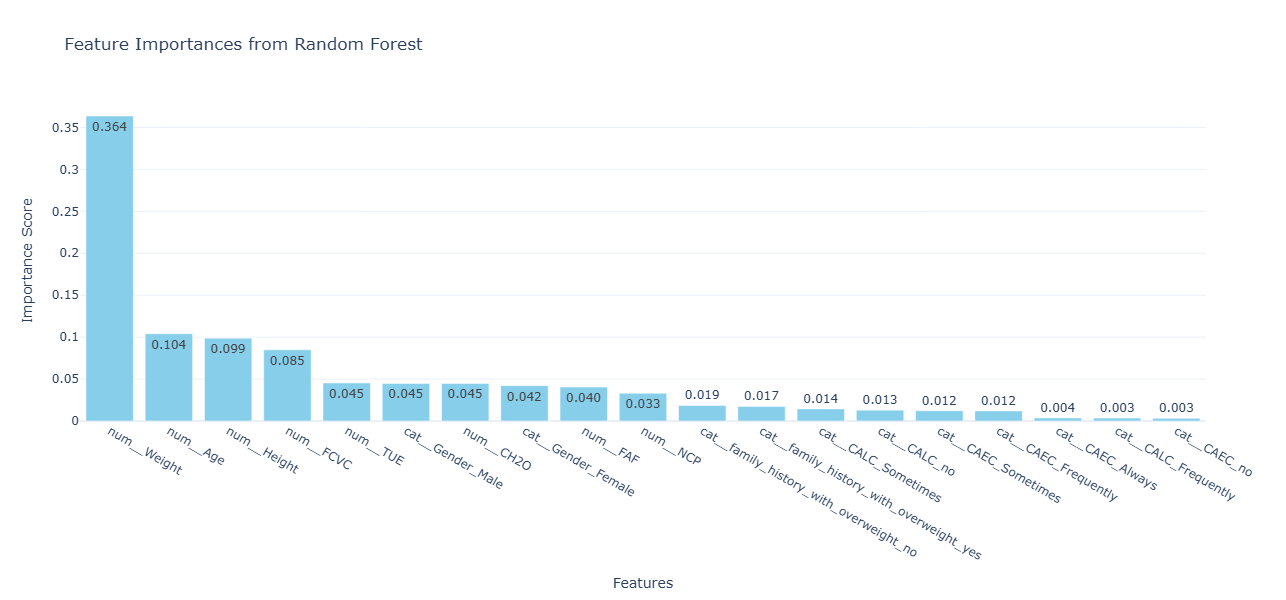

In [406]:
import plotly.graph_objects as go
# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get the feature importances from the Random Forest model
# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Optional: Sort the dictionary by importance in descending order
feature_importance_sorted = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True))

fig = go.Figure(data=[
        go.Bar(
            x=list(feature_importance_sorted.keys()),
            y=list(feature_importance_sorted.values()),
            marker=dict(color='skyblue'),
            text=[f"{v:.3f}" for v in feature_importance_sorted.values()],
            textposition='auto'
        )
    ])

# Update layout for better aesthetics
fig.update_layout(
    title='Feature Importances from Random Forest',
    xaxis_title='Features',
    yaxis_title="Importance Score",
    template='plotly_white',
    height=600
)

# Display the figure
fig.show()